# Text Mining Elon Musk

### Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
import wordcloud
import textblob
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [2]:
data= pd.read_csv("Elon_musk.csv",encoding = "ISO-8859-1", index_col=0)

In [3]:
data.head(10)

,Text
1,@kunalb11 Im an alien
2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
3,@joerogan @Spotify Great interview!
4,@gtera27 Doge is underestimated
5,@teslacn Congratulations Tesla China for amazi...
6,Happy New Year of the Ox! https://t.co/9WFKMYu2oj
7,"Frodo was the underdoge,\nAll thought he would..."
8,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)
9,@flcnhvy @anonyx10 Indeed! Tweets definitely d...
10,The most entertaining outcome is the most likely


In [4]:
data['word_count'] = data['Text'].apply(lambda x: len(str(x).split(" ")))

In [5]:
data[['Text','word_count']].head()

,Text,word_count
1,@kunalb11 Im an alien,4
2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,13
3,@joerogan @Spotify Great interview!,4
4,@gtera27 Doge is underestimated,4
5,@teslacn Congratulations Tesla China for amazi...,17


In [6]:
data['char_count'] = data['Text'].str.len() 
data[['Text','char_count']].head(10)

,Text,char_count
1,@kunalb11 Im an alien,22
2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,82
3,@joerogan @Spotify Great interview!,35
4,@gtera27 Doge is underestimated,31
5,@teslacn Congratulations Tesla China for amazi...,104
6,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,49
7,"Frodo was the underdoge,\nAll thought he would...",96
8,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),46
9,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,89
10,The most entertaining outcome is the most likely,48


In [10]:
data.head(20)

,Text,word_count,char_count
1,@kunalb11 im an alien,4,22
2,@id_aa_carmack ray tracing on cyberpunk with h...,13,82
3,@joerogan @spotify great interview!,4,35
4,@gtera27 doge is underestimated,4,31
5,@teslacn congratulations tesla china for amazi...,17,104
6,happy new year of the ox! https://t.co/9wfkmyu2oj,7,49
7,"frodo was the underdoge, all thought he would ...",12,96
8,@owensparks_ @flcnhvy @anonyx10 haha thanks :),6,46
9,@flcnhvy @anonyx10 indeed! tweets definitely d...,11,89
10,the most entertaining outcome is the most likely,8,48


In [15]:
data=data.drop(['char_count','word_count'],axis=1)

In [16]:
data.head()

,Text
1,@kunalb11 im an alien
2,@id_aa_carmack ray tracing on cyberpunk with h...
3,@joerogan @spotify great interview!
4,@gtera27 doge is underestimated
5,@teslacn congratulations tesla china for amazi...


In [17]:
data['Text'] = data['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [18]:
data.head(10)

,Text
1,@kunalb11 im an alien
2,@id_aa_carmack ray tracing on cyberpunk with h...
3,@joerogan @spotify great interview!
4,@gtera27 doge is underestimated
5,@teslacn congratulations tesla china for amazi...
6,happy new year of the ox! https://t.co/9wfkmyu2oj
7,"frodo was the underdoge, all thought he would ..."
8,@owensparks_ @flcnhvy @anonyx10 haha thanks :)
9,@flcnhvy @anonyx10 indeed! tweets definitely d...
10,the most entertaining outcome is the most likely


In [19]:
data['Text'] = data['Text'].str.replace('[^\w\s]','')

In [20]:
data.head(10)

,Text
1,kunalb11 im an alien
2,id_aa_carmack ray tracing on cyberpunk with hd...
3,joerogan spotify great interview
4,gtera27 doge is underestimated
5,teslacn congratulations tesla china for amazin...
6,happy new year of the ox httpstco9wfkmyu2oj
7,frodo was the underdoge all thought he would f...
8,owensparks_ flcnhvy anonyx10 haha thanks
9,flcnhvy anonyx10 indeed tweets definitely do n...
10,the most entertaining outcome is the most likely


In [21]:
stop= pd.read_csv('stop.txt')

In [22]:
data['Text'] = data['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [23]:
data.head(10)

,Text
1,kunalb11 im an alien
2,id_aa_carmack ray tracing on cyberpunk with hd...
3,joerogan spotify great interview
4,gtera27 doge is underestimated
5,teslacn congratulations tesla china for amazin...
6,happy new year of the ox httpstco9wfkmyu2oj
7,frodo was the underdoge all thought he would f...
8,owensparks_ flcnhvy anonyx10 haha thanks
9,flcnhvy anonyx10 indeed tweets definitely do n...
10,the most entertaining outcome is the most likely


In [24]:
freq = pd.Series(' '.join(data['Text']).split()).value_counts()[:10]

In [25]:
freq

the       487
to        400
is        355
of        315
spacex    239
in        219
amp       218
for       194
tesla     166
will      165
dtype: int64

In [26]:
freq = list(freq.index)
data['Text'] = data['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))

In [27]:
data.head(10)

,Text
1,kunalb11 im an alien
2,id_aa_carmack ray tracing on cyberpunk with hd...
3,joerogan spotify great interview
4,gtera27 doge underestimated
5,teslacn congratulations china amazing executio...
6,happy new year ox httpstco9wfkmyu2oj
7,frodo was underdoge all thought he would fail ...
8,owensparks_ flcnhvy anonyx10 haha thanks
9,flcnhvy anonyx10 indeed tweets definitely do n...
10,most entertaining outcome most likely


In [38]:
low_freq = pd.Series(' '.join(data['Text']).split()).value_counts()[-100:]

In [39]:
low_freq

skynet                1
moderna               1
learning              1
specialized           1
button                1
                     ..
failure               1
httpstcoej7iovx2w4    1
drsallyl              1
le                    1
bonded                1
Length: 100, dtype: int64

In [40]:
freq = list(low_freq.index)
data['Text'] = data['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))

In [41]:
data.head(10)

,Text
1,kunalb11 im an alien
2,id_aa_carmack ray tracing on cyberpunk with hd...
3,joerogan spotify great interview
4,gtera27 doge underestimated
5,teslacn congratulations china amazing executio...
6,happy new year ox httpstco9wfkmyu2oj
7,frodo was underdoge all thought he would fail ...
8,owensparks_ flcnhvy anonyx10 haha thanks
9,flcnhvy anonyx10 indeed tweets definitely do n...
10,most entertaining outcome most likely


In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Prasad\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [2]:
from textblob import TextBlob

In [58]:
data['Text'][:5].apply(lambda x: str(TextBlob(x).correct()))

1                                 kunalb11 in an alien
2    id_aa_carmack ray tracing on cyberpunk with he...
3                     joerogan specify great interview
4                          gtera27 done underestimated
5    teslacn congratulations china amazing executio...
Name: Text, dtype: object

In [59]:
TextBlob(data['Text'][1]).words

WordList(['kunalb11', 'im', 'an', 'alien'])

In [4]:
st = PorterStemmer()

In [61]:
data['Text'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

1                                 kunalb11 im an alien
2    id_aa_carmack ray trace on cyberpunk with hdr ...
3                     joerogan spotifi great interview
4                              gtera27 doge underestim
5    teslacn congratul china amaz execut last year ...
Name: Text, dtype: object

In [70]:
data.head(10)

,Text
1,kunalb11 im an alien
2,id_aa_carmack ray tracing on cyberpunk with hd...
3,joerogan spotify great interview
4,gtera27 doge underestimated
5,teslacn congratulation china amazing execution...
6,happy new year ox httpstco9wfkmyu2oj
7,frodo wa underdoge all thought he would fail h...
8,owensparks_ flcnhvy anonyx10 haha thanks
9,flcnhvy anonyx10 indeed tweet definitely do no...
10,most entertaining outcome most likely


In [3]:
from textblob import Word

In [37]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Prasad\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [68]:
data['Text'] = data['Text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [69]:
data.head(10)

,Text
1,kunalb11 im an alien
2,id_aa_carmack ray tracing on cyberpunk with hd...
3,joerogan spotify great interview
4,gtera27 doge underestimated
5,teslacn congratulation china amazing execution...
6,happy new year ox httpstco9wfkmyu2oj
7,frodo wa underdoge all thought he would fail h...
8,owensparks_ flcnhvy anonyx10 haha thanks
9,flcnhvy anonyx10 indeed tweet definitely do no...
10,most entertaining outcome most likely


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [81]:
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1))
data_vect = tfidf.fit_transform(data['Text'])

In [82]:
data_vect

<1999x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 8293 stored elements in Compressed Sparse Row format>

In [83]:
data['Text'][:5].apply(lambda x: TextBlob(x).sentiment)

1                  (-0.25, 0.75)
2                     (0.0, 0.0)
3                    (0.8, 0.75)
4                     (0.0, 0.0)
5    (0.275, 0.3666666666666667)
Name: Text, dtype: object

In [84]:
data['sentiment'] = data['Text'].apply(lambda x: TextBlob(x).sentiment[0] )

In [92]:
data[['Text','sentiment']].head(15)

,Text,sentiment
1,kunalb11 im an alien,-0.250000
2,id_aa_carmack ray tracing on cyberpunk with hd...,0.000000
3,joerogan spotify great interview,0.800000
4,gtera27 doge underestimated,0.000000
5,teslacn congratulation china amazing execution...,0.275000
6,happy new year ox httpstco9wfkmyu2oj,0.468182
7,frodo wa underdoge all thought he would fail h...,0.000000
8,owensparks_ flcnhvy anonyx10 haha thanks,0.200000
9,flcnhvy anonyx10 indeed tweet definitely do no...,0.000000
10,most entertaining outcome most likely,0.375000


In [5]:
import numpy as np
import pandas as pd 
import string 
import spacy 

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [7]:
book=pd.read_csv("Amazon - moile case reviews.txt")

In [8]:
book

,x
0,This is a best case I have ever purchased. Whe...
1,This is an awesome armour protection for samsu...
2,Amazing and durable product. Looking stylish 😎...
3,Wow amazing case. When I attached the case it ...
4,Cut 2 cut fix ... amazing to buy. Happy for th...
5,Exceptional quality and majestic.This black an...
6,I got the product delivered today (1st Jan 202...
7,Just got the cover and looks pretty awesome an...
8,This is an excellent back cover for mobile. It...
9,"This is an exact fit for Samsung M51, the cuts..."


In [8]:
book['x'] = book['x'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [11]:
book.head(10)

,x
0,this is a best case i have ever purchased. whe...
1,this is an awesome armour protection for samsu...
2,amazing and durable product. looking stylish 😎...
3,wow amazing case. when i attached the case it ...
4,cut 2 cut fix ... amazing to buy. happy for th...
5,exceptional quality and majestic.this black an...
6,i got the product delivered today (1st jan 202...
7,just got the cover and looks pretty awesome an...
8,this is an excellent back cover for mobile. it...
9,"this is an exact fit for samsung m51, the cuts..."


In [9]:
book['x'] = book['x'].str.replace('[^\w\s]','')

In [14]:
book.head(10)

,x
0,this is a best case i have ever purchased when...
1,this is an awesome armour protection for samsu...
2,amazing and durable product looking stylish b...
3,wow amazing case when i attached the case it f...
4,cut 2 cut fix amazing to buy happy for the it...
5,exceptional quality and majesticthis black and...
6,i got the product delivered today 1st jan 2021...
7,just got the cover and looks pretty awesome an...
8,this is an excellent back cover for mobile it ...
9,this is an exact fit for samsung m51 the cuts ...


In [10]:
stop= pd.read_csv('stop.txt')

In [11]:
book['x'] = book['x'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [12]:
high_freq = pd.Series(' '.join(book['x']).split()).value_counts()[:10]

In [19]:
high_freq

the      124
and       74
is        66
it        61
for       55
to        45
phone     44
this      37
good      34
i         34
dtype: int64

In [13]:
freq = list(high_freq.index)
book['x'] = book['x'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))

In [14]:
low_freq = pd.Series(' '.join(book['x']).split()).value_counts()[-10:]

In [23]:
low_freq

clean          1
supporting     1
consists       1
costly         1
greatthank     1
pretty         1
days           1
900            1
bad            1
description    1
dtype: int64

In [15]:
freq = list(low_freq.index)
book['x'] = book['x'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))

In [26]:
book.head(10)

,x
0,best case have ever purchased when galaxy m51 ...
1,an awesome armour protection samsung m51 laser...
2,amazing durable product looking stylish better...
3,wow amazing case when attached case felt so be...
4,cut 2 cut fix amazing buy happy item paid can ...
5,exceptional quality majesticthis black grey mi...
6,got product delivered today 1st jan 2021 morni...
7,just got cover looks awesome looks sturdy dura...
8,an excellent back cover mobile built m51 you c...
9,an exact fit samsung m51 cuts are damn precise...


In [16]:
from textblob import TextBlob

In [17]:
book['x'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    best case have ever purchased when galaxy may ...
1    an awesome armour protection samson may laser ...
2    amazing unable product looking stylish better ...
3    now amazing case when attached case felt so be...
4    cut 2 cut fix amazing buy happy item paid can ...
Name: x, dtype: object

In [31]:
TextBlob(book['x'][1]).words

WordList(['an', 'awesome', 'armour', 'protection', 'samsung', 'm51', 'laser', 'cutting', 'so', 'precise', 'looks', 'feels', 'premium', 'you', 'can', 'use', 'mobile', 'without', 'any', 'drop', 'worries', 'also', 'stand', 'at', 'back', 'helpful', 'be', 'used', 'as', 'mobile', 'stand', 'alternatively', 'can', 'also', 'be', 'used', 'as', 'ring', 'holder', 'magnetic', 'holder', 'works', 'perfectly', 'overall', 'cover', 'best', 'buy', 'with', 'these', 'many', 'added', 'advantages', 'at', 'an', 'affordable', 'price', 'bought', '250', 'dont', 'think', 'just', 'blindly', 'go', 'you', 'wont', 'regret'])

In [20]:
st = PorterStemmer()

In [19]:
book['x'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0    best case have ever purchas when galaxi m51 la...
1    an awesom armour protect samsung m51 laser cut...
2    amaz durabl product look stylish better than o...
3    wow amaz case when attach case felt so best fi...
4    cut 2 cut fix amaz buy happi item paid can go ...
Name: x, dtype: object

In [34]:
from textblob import Word

In [21]:
book['x'] = book['x'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [22]:
afinn = pd.read_csv('afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [23]:
afinn.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [24]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [25]:
import spacy

In [35]:
nlp = spacy.load("en_core_web_sm")

In [36]:
sentiment_lexicon = affinity_scores

In [37]:
def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        text = nlp(text)
        for word in text:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [38]:
calculate_sentiment(text = 'amazing')

4

In [40]:
book['sentiment_value'] = book['x'].apply(calculate_sentiment)

In [41]:
book['word_count'] = book['x'].str.split().apply(len)
book['word_count'].head(10)

0    58
1    65
2    14
3    35
4    40
5    23
6    67
7    71
8    49
9    42
Name: word_count, dtype: int64

In [42]:
book.sort_values(by='sentiment_value').tail(15)

,x,sentiment_value,word_count
1,an awesome armour protection samsung m51 laser...,7,65
39,well product sturdy in design fit perfectly it...,7,45
2,amazing durable product looking stylish better...,7,14
48,accurate fitting excellent product amazing pac...,7,16
27,product of very quality precisely designed mat...,8,19
41,like innovation with product small stand in ba...,8,19
47,really an awesome armour protection samsung m5...,9,33
8,an excellent back cover mobile built m51 you c...,10,49
49,just excellent sturdy but not heavy suit m51 w...,11,17
32,one of best fitting looking cover look super c...,11,30


In [43]:
book['sentiment_value'].describe()

count    59.000000
mean      4.372881
std       4.748496
min      -3.000000
25%       0.500000
50%       4.000000
75%       7.000000
max      19.000000
Name: sentiment_value, dtype: float64

In [44]:
book[book['sentiment_value']<=0].head(10)

,x,sentiment_value,word_count
17,today only received mobile case my m51 quality...,0,38
20,just go extremely well cut out hole access fin...,-1,15
25,seller took 67 week deliver product cover cons...,0,31
26,go itit look premiumcutouts are so meticulous ...,-2,21
33,it an armour your after you can be tension fre...,-3,18
36,brought 249 value money quality feel rubber be...,0,12
37,waste product doesnt last long waste of money ...,-2,21
44,quite sturdy my fell down once but nothing hap...,0,21
45,value money durable sturdy,0,4
46,product amazinggiving protection of correct si...,-2,31


In [46]:
book['index']=range(0,len(book))

C:\Users\Prasad\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

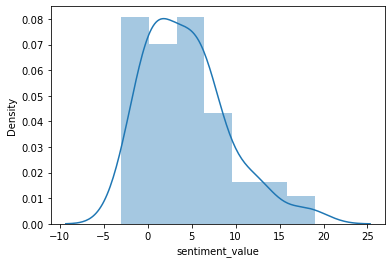

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(book['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

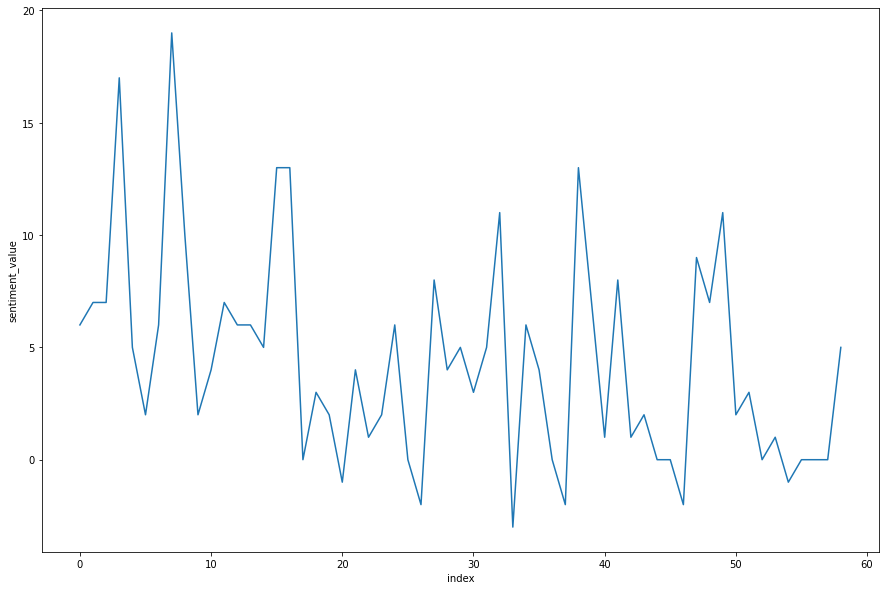

In [49]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=book)

<AxesSubplot:title={'center':'text sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

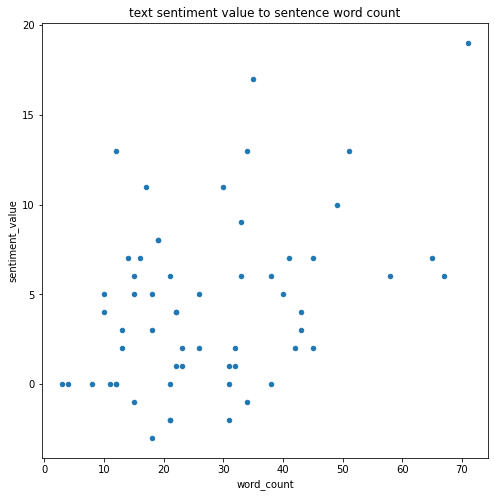

In [50]:
book.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='text sentiment value to sentence word count')